In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("./../")

In [3]:
# default libraries
import time
import datetime
import pickle
import pprint
from pathlib import Path
import math


# third party libraries
import torch
import torchvision
import torchvision.transforms as T

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from dotted_dict import DottedDict


Files

In [4]:
p_data = Path('/mnt/data/experiments/EfficientCN/sem_comp')
p_cnn_cr = p_data / 'semcomp_mnist_MnistCNN_CR_2022_02_03_16_27_32'
p_cnn_cr_sf = p_data / 'semcomp_mnist_MnistCNN_CR_SF_2022_02_03_16_27_48'
p_cnn_r = p_data / 'semcomp_mnist_MnistCNN_R_2022_02_04_09_41_08'
p_effcn = p_data / 'semcomp_mnist_MnistEffCapsNet_2022_02_03_17_49_52'

In [5]:
p_cnn_r

PosixPath('/mnt/data/experiments/EfficientCN/sem_comp/semcomp_mnist_MnistCNN_R_2022_02_04_09_41_08')

In [164]:
"""
stats = {
    "model": str(p_model),
    "dataset": str(p_data),
    "train": config.ds.train,
    "affine": name,
    "pca": {
        'pca_eig': pca_eig,
        'pca_mean': pca_mean,
    },
    "kld": {
        'kld_val': kl_div,
        'kld_mean': kld_mean,
    }
}  
"""

'\nstats = {\n    "model": str(p_model),\n    "dataset": str(p_data),\n    "train": config.ds.train,\n    "affine": name,\n    "pca": {\n        \'pca_eig\': pca_eig,\n        \'pca_mean\': pca_mean,\n    },\n    "kld": {\n        \'kld_val\': kl_div,\n        \'kld_mean\': kld_mean,\n    }\n}  \n'

In [6]:
p_exps = [p_cnn_r, p_cnn_cr, p_cnn_cr_sf, p_effcn]

kld = []
pca = []

for p_exp in p_exps:

    file1 = open(p_exp / 'stats_affine_xtrans.pkl', 'rb')
    xtrans = DottedDict(pickle.load(file1))
    file1.close()

    file2 = open(p_exp / 'stats_affine_ytrans.pkl', 'rb')
    ytrans = DottedDict(pickle.load(file2))
    file2.close()

    file3 = open(p_exp / 'stats_affine_rot.pkl', 'rb')
    rot = DottedDict(pickle.load(file3))
    file3.close()

    file4 = open(p_exp / 'stats_affine_scale.pkl', 'rb')
    scale = DottedDict(pickle.load(file4))
    file4.close()

    file5 = open(p_exp / 'stats_affine_shear.pkl', 'rb')
    shear = DottedDict(pickle.load(file5))
    file5.close()

    file6 = open(p_exp / 'config.pkl', 'rb')
    config = DottedDict(pickle.load(file6))
    file6.close()


    kld_mean = [xtrans.kld.kld_mean, ytrans.kld.kld_mean, rot.kld.kld_mean, scale.kld.kld_mean, shear.kld.kld_mean]
    kld.append(kld_mean)
    pca_mean = [xtrans.pca.pca_mean.tolist(), ytrans.pca.pca_mean.tolist(), rot.pca.pca_mean.tolist(), scale.pca.pca_mean.tolist(), shear.pca.pca_mean.tolist()]
    pca.append(pca_mean)



In [166]:
#config.model
#xtrans.kld.kld_mean

#print(torch.tensor(kld))
#print('\n')
#pca_c = torch.tensor(pca[1:])
#print(pca_c)

#print(pca_c.shape)

In [12]:
def matplot(matrix, x_ticks=None, y_ticks=None, title=None):
    fig, ax = plt.subplots(figsize=[8,8])
    im = ax.imshow(matrix)

    # Show all ticks and label them with the respective list entries
    if x_ticks != None:
        ax.set_xticks(np.arange(len(x_ticks)), labels=x_ticks)
        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")
    if y_ticks != None:
        ax.set_yticks(np.arange(len(y_ticks)), labels=y_ticks)

    if title != None:
        ax.set_title(title)

    # Loop over data dimensions and create text annotations.
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="w")

    fig.tight_layout()
    plt.savefig('/home/mkoch/projects/EfficientCN/compactness/kld.png')

    plt.show()

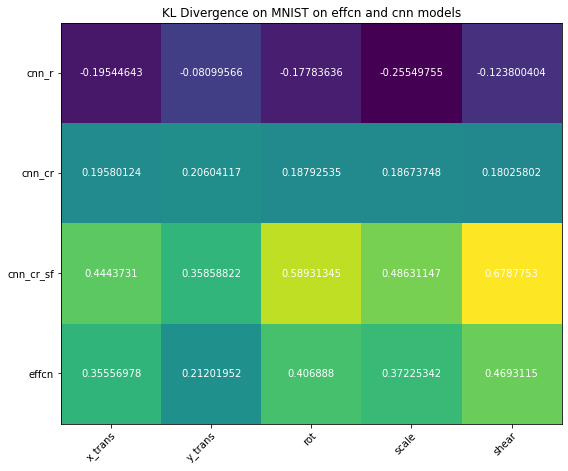

In [13]:
affines = ["x_trans", "y_trans", "rot", "scale","shear"]
models = ["cnn_r", "cnn_cr", "cnn_cr_sf", "effcn"]
title = "KL Divergence on MNIST on effcn and cnn models"

kld_c = torch.tensor(kld).numpy()

matplot(kld_c, affines, models, title)


Datasets MNIST
Factors Rotation Trans-X Trans-Y Scale Shear-X Shear-Y
ConvNet-R 0.0003 0.0016 0.0009 0.0004 0.0003 0.0007
ConvNet-CR 0.0028 0.0038 0.0032 0.0052 0.0058 0.0022
ConvNet-CR-SF 0.0325 0.2010 0.3192 0.0146 0.0476 0.0506
CapsNet 0.0031 0.0107 0.0464 0.0026 0.0098 0.0021

In [43]:
kld_ref = np.array([[0.0003, 0.0016, 0.0009, 0.0004, 0.0003, 0.0007],
                    [0.0028, 0.0038, 0.0032, 0.0052, 0.0058, 0.0022],
                    [0.0325, 0.2010, 0.3192, 0.0146, 0.0476, 0.0506],
                    [0.0031, 0.0107, 0.0464, 0.0026, 0.0098, 0.0021]]) 


r = np.zeros(kld_ref.shape)
r[:,:5] = kld_c
r[:,5] = kld_c[:,4]

t = r / kld_ref 

print(t)


[[-651.48810546  -50.62228534 -197.59595394 -638.74386251 -412.66801457
  -176.85772053]
 [  69.92901542   54.22136109   58.72667301   35.91105342   31.0789691
    81.93546398]
 [  13.67301849    1.78402099    1.84622007   33.30900449   14.25998552
    13.41453183]
 [ 114.69992899   19.81490823    8.76913811  143.17439153   47.88892914
   223.48166931]]


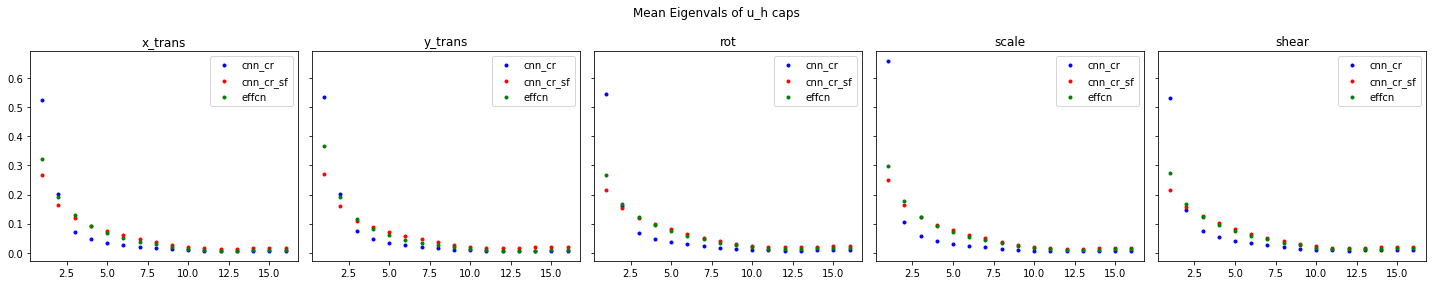

In [14]:
affines = ["x_trans", "y_trans", "rot", "scale","shear"]
models = ["cnn_r", "cnn_cr", "cnn_cr_sf", "effcn"]
title = 'Mean Eigenvals of u_h caps'
pca_c = torch.tensor(pca[1:])
x = torch.arange(1,pca_c.shape[2]+1,1)


fig, ax = plt.subplots(1,pca_c.shape[1], figsize=[20,4], sharey=True)

id = 0
ax[id].plot(x, pca_c[0,0].numpy(), 'b.',label=models[1])
ax[id].plot(x, pca_c[1,0].numpy(), 'r.',label=models[2])
ax[id].plot(x, pca_c[2,0].numpy(), 'g.',label=models[3])
ax[id].set_title(affines[0])
ax[id].legend()
id += 1
ax[id].plot(x, pca_c[0,1].numpy(), 'b.',label=models[1])
ax[id].plot(x, pca_c[1,1].numpy(), 'r.',label=models[2])
ax[id].plot(x, pca_c[2,1].numpy(), 'g.',label=models[3])
ax[id].set_title(affines[1])
ax[id].legend()
id += 1
ax[id].plot(x, pca_c[0,2].numpy(), 'b.',label=models[1])
ax[id].plot(x, pca_c[1,2].numpy(), 'r.',label=models[2])
ax[id].plot(x, pca_c[2,2].numpy(), 'g.',label=models[3])
ax[id].set_title(affines[2])
ax[id].legend()
id += 1
ax[id].plot(x, pca_c[0,3].numpy(), 'b.',label=models[1])
ax[id].plot(x, pca_c[1,3].numpy(), 'r.',label=models[2])
ax[id].plot(x, pca_c[2,3].numpy(), 'g.',label=models[3])
ax[id].set_title(affines[3])
ax[id].legend()
id += 1
ax[id].plot(x, pca_c[0,4].numpy(), 'b.',label=models[1])
ax[id].plot(x, pca_c[1,4].numpy(), 'r.',label=models[2])
ax[id].plot(x, pca_c[2,4].numpy(), 'g.',label=models[3])
ax[id].set_title(affines[4])
ax[id].legend()

fig.suptitle('Mean Eigenvals of u_h caps')
fig.tight_layout()
plt.savefig('/home/mkoch/projects/EfficientCN/compactness/pca.png')
plt.show()